# CaseStudy of Water Purifier Analysis

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re 
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df4=pd.read_csv(r"C:Water_purifier2.csv")

In [3]:
df4.drop(columns='Unnamed: 0',inplace=True)
df4 

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,KENT Ace,15999,21000,4.4,23.0,Free delivery,Electrical & Storage,5
1,Aqua Fresh,4514,16500,4.1,72.0,Free delivery,Electrical & Storage,12
2,Aquagrand SkyLand,4822,14500,4.0,66.0,Free delivery,Electrical & Storage,18
3,Pureit Advanced,7799,11399,4.5,31.0,Free delivery,Electrical & Storage,12
4,Pureit by,9499,18500,4.5,48.0,Free delivery,Electrical & Storage,20
...,...,...,...,...,...,...,...,...
663,Blair CRYSTA,4929,19999,4.3,75.0,Free delivery,Electrical & Storage,17
664,Blair FUSION,4934,19999,4.3,75.0,Free delivery,Electrical & Storage,17
665,AQUA Red,5699,14500,4.3,60.0,Free delivery,Electrical & Storage,5
666,ojhashree Aqua,5990,15990,4.3,62.0,Free delivery,Electrical & Storage,5


In [4]:
df4.dtypes

ProductName          object
Price(₹)              int64
Original_cost(₹)      int64
Rating              float64
Discount(%)         float64
Delivery_offers      object
Type_models          object
Capacity (L/hr)       int64
dtype: object

In [5]:
df4.shape

(668, 8)

In [6]:
df4['Capacity (L/hr)'].value_counts()

5        278
12       116
15       109
18        32
20        30
10        27
17        13
6000       7
8          5
30         5
16         5
60         4
1          4
25         4
22         4
100        3
14         3
9          3
7          2
50         2
120        2
24         2
10000      1
2          1
3          1
7000       1
45         1
19         1
6          1
2500       1
Name: Capacity (L/hr), dtype: int64

# User requires only Electrical & Storage type

In [7]:
df_user = df4[df4['Type_models']=='Electrical & Storage']

# User requires Water purifier under Rs.6000

In [8]:
df_user = df_user[df_user['Price(₹)']<6000]

# User requires storage capacity of 5L

In [9]:
df_user = df_user[df_user['Capacity (L/hr)']==5]

In [10]:
df_user

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
19,Aqua Fresh,4413,9142,4.1,51.0,Free delivery,Electrical & Storage,5
23,Aqua Fresh,4374,14289,3.9,69.0,Free delivery,Electrical & Storage,5
44,Aqua Ace,4769,14999,4.1,68.0,Free delivery,Electrical & Storage,5
50,proven Water,5034,19990,4.0,74.0,Free delivery,Electrical & Storage,5
65,Grand plus,4499,16500,3.7,72.0,Free delivery,Electrical & Storage,5
...,...,...,...,...,...,...,...,...
649,Aquamart Advance,4511,19999,4.3,77.0,Free delivery,Electrical & Storage,5
657,Aquaultra A700,4699,11500,3.8,59.0,Free delivery,Electrical & Storage,5
665,AQUA Red,5699,14500,4.3,60.0,Free delivery,Electrical & Storage,5
666,ojhashree Aqua,5990,15990,4.3,62.0,Free delivery,Electrical & Storage,5


In [11]:
df_user.describe()

,Price(₹),Original_cost(₹),Rating,Discount(%),Capacity (L/hr)
count,83.000000,83.000000,83.000000,83.000000,83.0
mean,4699.951807,14716.506024,4.081928,65.554217,5.0
std,792.425682,3707.179150,0.294314,10.574074,0.0
min,299.000000,999.000000,3.300000,8.000000,5.0
25%,4462.500000,13500.000000,3.900000,63.000000,5.0
50%,4799.000000,14999.000000,4.200000,67.000000,5.0
75%,4999.000000,16500.000000,4.300000,72.000000,5.0
max,5990.000000,20000.000000,4.800000,77.000000,5.0


In [12]:
df_user["ProductName"].value_counts()

Aqua Fresh              13
Grand plus               8
AQUA LIBRA               4
Royal Aquafresh          4
R.K. AQUA                3
Aquaultra Advance        2
proven 3000              2
Kinsco Aqua              2
AQUA grand               2
AQUA Red                 2
Aqua Ace                 2
Blair EPIC               2
AO Smith                 1
Aqua Supreme             1
G Series                 1
WATERPURE AWS            1
Aquaultra A1011          1
fedula AQUA              1
AquaDart Active          1
Aquagrand Epic           1
AquaDart Copper          1
AQUA                     1
AquaDart RO              1
Aquagrand Megastar       1
AquaDart Alkaline        1
Aquamart Advance         1
Aquaultra A700           1
ojhashree Aqua           1
Aquaultra ULS            1
Oseasaqua Fresh          1
Earth Ro                 1
Aquaultra Sophia         1
proven Water             1
Aquaultra Reeva          1
Remino 10                1
proven Alkaline          1
MarQ by                  1
A

In [13]:
df_user['ProductName'].nunique()

49

In [14]:
df_user['Type_models'].unique()

array(['Electrical & Storage'], dtype=object)

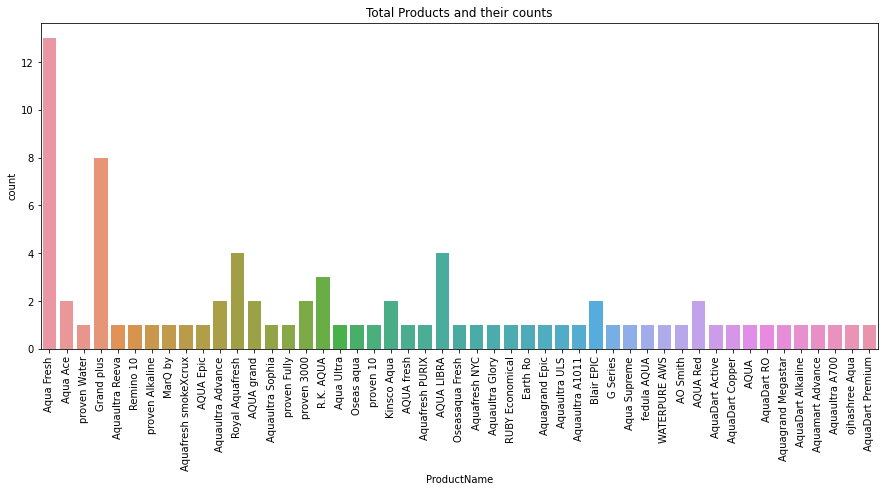

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x="ProductName",data=df_user).set(title='Total Products and their counts')
plt.xticks(rotation = 90)
plt.show()

# Observations
- Grand plus has more products approxmatlly 10 counts

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


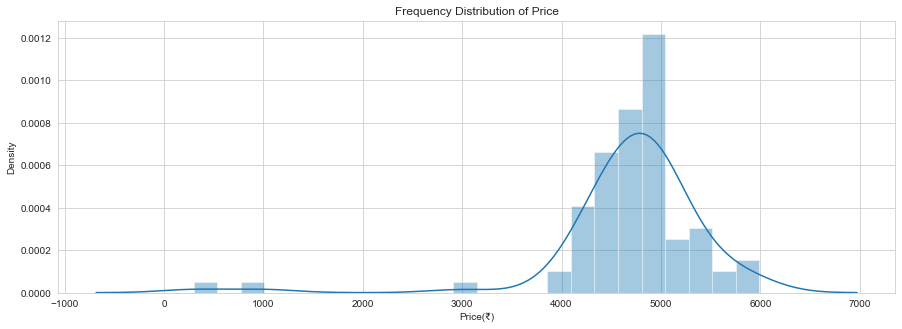

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.distplot(df_user["Price(₹)"],kde=True)
plt.title('Frequency Distribution of Price')
plt.show()

# Observations
- In below Rs.6000 there are more products at Rs.4500
- There is more then 0.0006 probabilty for having the price range of Rs.4500

# categorical

In [17]:
df_user["Delivery_offers"].value_counts()

Free delivery       75
Delivery charges     8
Name: Delivery_offers, dtype: int64

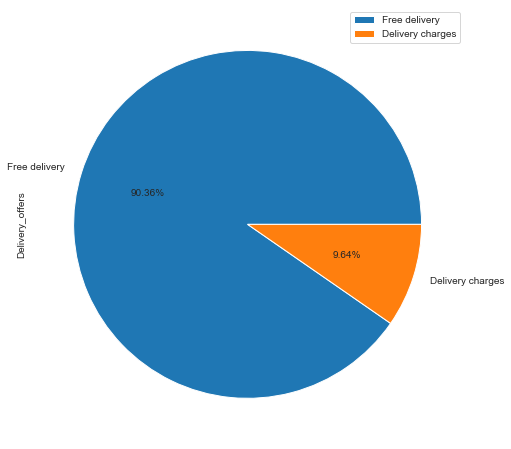

In [18]:
plt.figure(figsize=(10,8))
df_user["Delivery_offers"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Free delivery','Delivery charges'])
plt.show()

# Observations
- There are 79.79% of free delivery items in the price range below Rs.6000
- There is 20.21% of devlivery charged items in the price range below Rs.6000 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

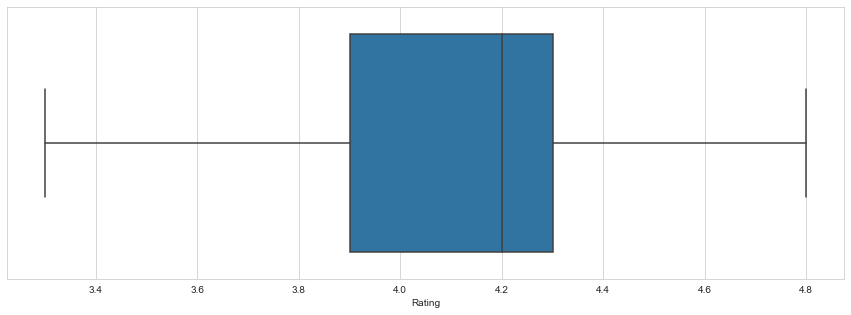

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(df_user["Rating"],data=df_user)

# Observations
- There was more ratings between 4.0 to 4.3 in the price range below Rs.6000

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Original_cost(₹)'>

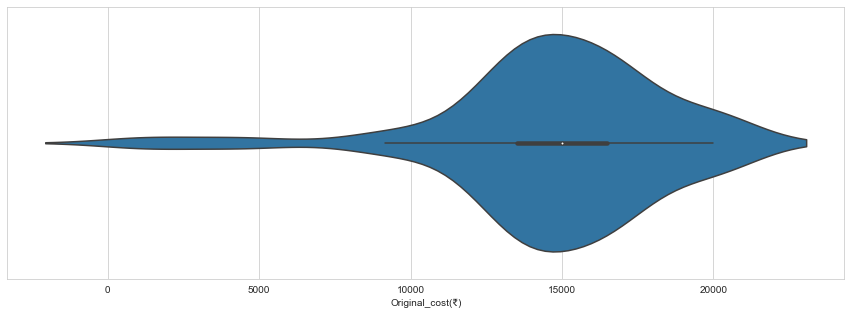

In [20]:
plt.figure(figsize=(15,5))
sns.violinplot(df_user["Original_cost(₹)"])

# Observations
- At Rs.15000 there was more items for original cost in the price range below Rs.6000 

# Boxplot

In [21]:
df_user.columns

Index(['ProductName', 'Price(₹)', 'Original_cost(₹)', 'Rating', 'Discount(%)',
       'Delivery_offers', 'Type_models', 'Capacity (L/hr)'],
      dtype='object')

<AxesSubplot:xlabel='Original_cost(₹)', ylabel='Discount(%)'>

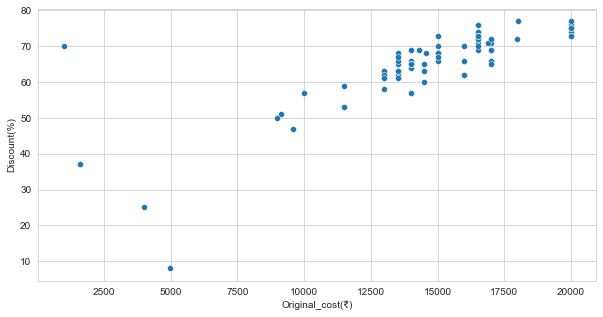

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='Discount(%)',x='Original_cost(₹)',data=df_user)

# Observations
- For price range between Rs.12500-Rs.20000 having more discount from 60% to above 70%.

<AxesSubplot:xlabel='Rating', ylabel='Price(₹)'>

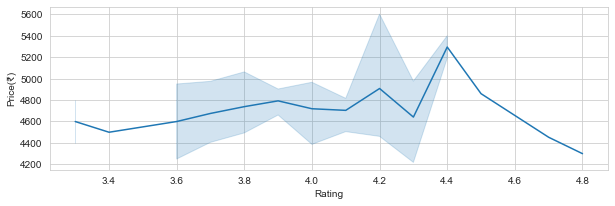

In [23]:
plt.figure(figsize=(10,3))
sns.lineplot(x='Rating',y='Price(₹)',data=df_user)
# Most preferred rating is 4.5 with price 12500 to 15000

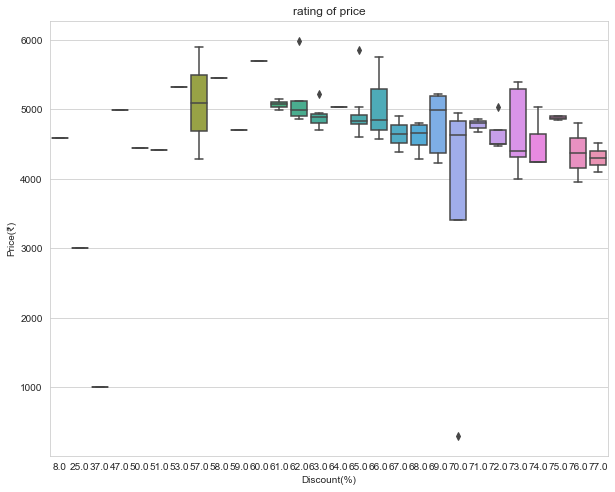

In [24]:
plt.figure(figsize=[10,8])
sns.boxplot(x="Discount(%)", y="Price(₹)", data=df_user)
plt.title('rating of price')
plt.show()

# Heat Map

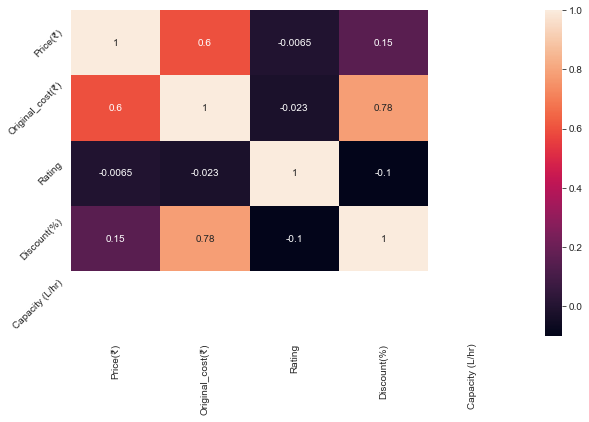

In [25]:
plt.figure(figsize=(10,6)) # very useful plot to check correlations between any two numerical variables
sns.heatmap(df_user.corr(),annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

# Box plot

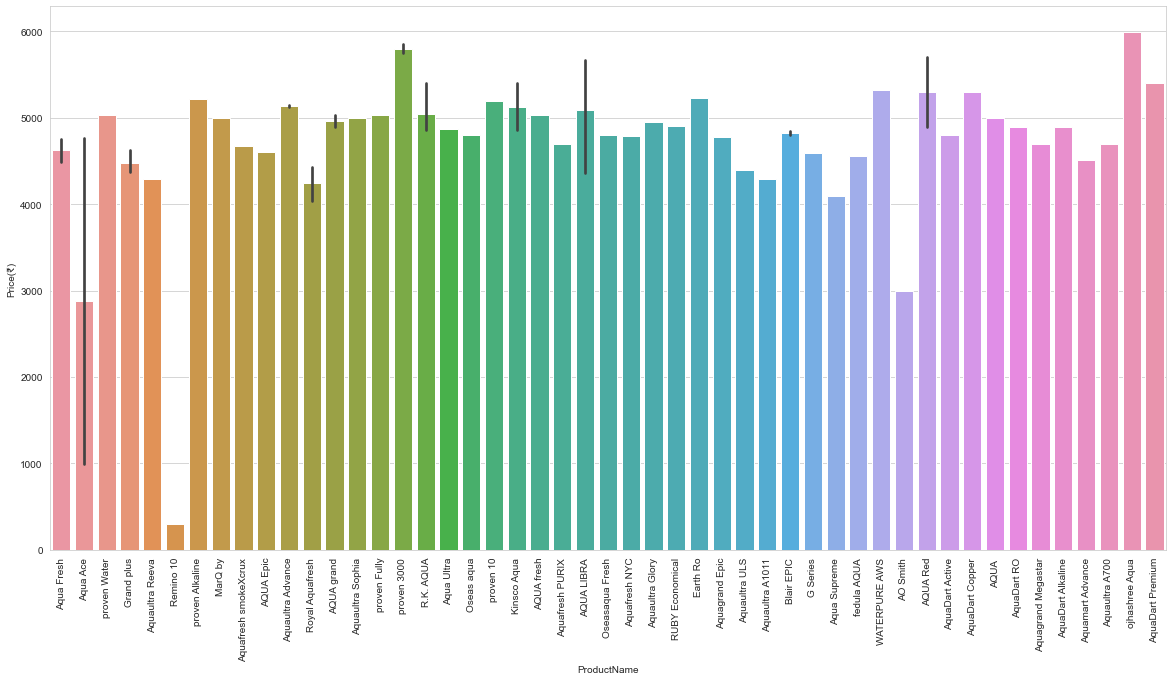

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='ProductName',y='Price(₹)',data=df_user)
plt.xticks(rotation = 90)
plt.show()

## BOX plot

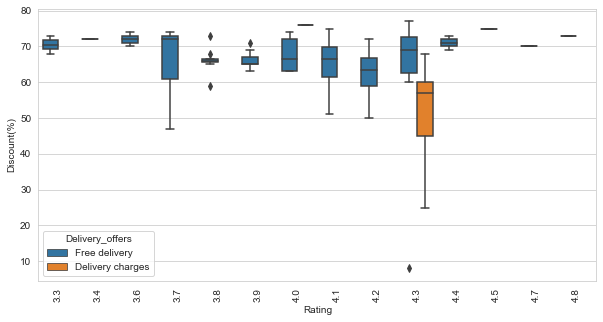

In [27]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_user, x="Rating", y="Discount(%)", hue="Delivery_offers")
plt.xticks(rotation = 90)
plt.show()

# Observations

+ In between ratings of 4.3 to 4.7 the delivery chages are more
+ The 60-70% of discount water purifiers delivery is free

# Thank you